In [1]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from hazm import *
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
df = pd.read_excel(r"C:\Users\EMTOO\OneDrive\Desktop\Sentiment Analysis.xlsx")
# df.to_csv(r"C:\Users\EMTOO\OneDrive\Desktop\Sentiment Analysis.csv", index=False, encoding='utf-8')
# df = pd.read_csv(r"C:\Users\EMTOO\OneDrive\Desktop\Sentiment Analysis.csv",index_col=0 ,encoding='utf-8')

import string




In [2]:
hazm_lemmatizer=Lemmatizer()
hazm_stemmer=Stemmer()

In [3]:

# import pandas as pd
# df=pd.read_csv(r"C:\Users\EMTOO\Downloads\farsi_sentiment_dataset_utf8sig.csv")
# df=pd.DataFrame(df)

In [4]:
print(df.columns)
print("تعداد ستون:", len(df.columns))


Index(['text', 'rate'], dtype='object')
تعداد ستون: 2


In [5]:
df.columns=['text','rate']
df.shape

(78, 2)

In [6]:
text=df['text']
y=[i for i in df['rate']]
y = df['rate'] - 1 
y= np.array(y)
text

0                          من پر از انرژی و انگیزه هستم
1        من در هر لحظه از زندگی‌ام در حال رشد و پیشرفتم
2                  من امروز یک فرد موفق و شاد خواهم بود
3                        من به قدرت ذهن مثبت ایمان دارم
4     من هر روز بیشتر به خودم و توانایی‌هایم اعتماد ...
                            ...                        
73                         به دستم نرسید اینا دزد هستند
74                     این محصول کلاه برداری و دزدی هست
75                                    لعنت به سازندگانش
76                           شاید یه روزی به دردم بخوره
77                                 شاید باز هم خرید کنم
Name: text, Length: 78, dtype: object

C:\Users\EMTOO\AppData\Local\Temp\ipykernel_23540\2302293815.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['rate'], data=df, palette='pastel')


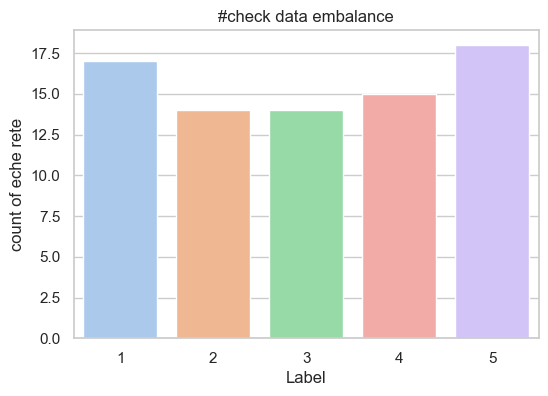

In [7]:
sns.set(style="whitegrid")   
plt.figure(figsize=(6, 4))
sns.countplot(x=df['rate'], data=df, palette='pastel')
plt.title("#check data embalance")
plt.xlabel("Label")
plt.ylabel("count of eche rete") 
plt.show()

In [8]:

pre_text=[]
chunck=[]
# def preprocesse(text):
for sent in text:
    bag=word_tokenize(sent)
    chunck=[]
    for token in bag:
        # stem_word=hazm_stemmer.stem(token)
        lemi_bag=hazm_lemmatizer.lemmatize(token) #stem_word)
        chunck.append(lemi_bag)
    pre_text.append(chunck)
print(pre_text)


[['من', 'پر', 'از', 'انرژی', 'و', 'انگیزه', '#هست'], ['من', 'در', 'هر', 'لحظه', 'از', 'زندگی', 'در', 'حال', 'رشد', 'و', 'پیشرفتم'], ['من', 'امروز', 'یک', 'فرد', 'موفق', 'و', 'شاد', 'بود#است'], ['من', 'به', 'قدرت', 'ذهن', 'مثبت', 'ایمان', 'داشت#دار'], ['من', 'هر', 'روز', 'بیشتر', 'به', 'خودم', 'و', 'توانایی', 'اعتماد', 'کرد#کن'], ['من', 'در', 'قلبم', 'شادی', 'و', 'آرامش', 'داشت#دار'], ['من', 'با', 'انرژی', 'مثبت', '،', 'دنیا', 'را', 'تغییر', 'داد#ده'], ['من', 'لایق', 'خوشبختی', 'و', 'موفقیت', '#هست'], ['صد', 'درصد', 'توصیه', 'کرد#کن', '،', 'کیفیت', 'بی\u200cنظیره', '.'], ['به', 'موقع', 'رسید', '،', 'بسته\u200cبندی', 'عالی', '،', 'خود', 'محصول', 'خیلی', 'خوبه', '.'], ['واقعا', 'از', 'خرید#خر', 'راضی', '،', 'همه', 'چی', 'مطابق', 'انتظار', 'بود#است', '.'], ['نسبت', 'به', 'قیمت', 'خیلی', 'ارزش', 'خرید', 'داره', '.'], ['حتماً', 'دوباره', 'از', 'همین', 'فروشنده', 'خرید', 'کرد#کن', '.'], ['خیلی', 'شیک', 'و', 'باکیفیته', '،', 'دقیقاً', 'همونی', 'بود#است', 'که', 'خواست#خواه'], ['یه', 'خرید', 'عا

In [9]:
punctuations = set(['.', '،', '!', '?', '؟', ':', ';', '(', ')', '[', ']', '«', '»',',',","])
X=[]
for i in pre_text:
    filtered_tokens = [token for token in i if token not in punctuations] 
    X.append(filtered_tokens)
print(X)


[['من', 'پر', 'از', 'انرژی', 'و', 'انگیزه', '#هست'], ['من', 'در', 'هر', 'لحظه', 'از', 'زندگی', 'در', 'حال', 'رشد', 'و', 'پیشرفتم'], ['من', 'امروز', 'یک', 'فرد', 'موفق', 'و', 'شاد', 'بود#است'], ['من', 'به', 'قدرت', 'ذهن', 'مثبت', 'ایمان', 'داشت#دار'], ['من', 'هر', 'روز', 'بیشتر', 'به', 'خودم', 'و', 'توانایی', 'اعتماد', 'کرد#کن'], ['من', 'در', 'قلبم', 'شادی', 'و', 'آرامش', 'داشت#دار'], ['من', 'با', 'انرژی', 'مثبت', 'دنیا', 'را', 'تغییر', 'داد#ده'], ['من', 'لایق', 'خوشبختی', 'و', 'موفقیت', '#هست'], ['صد', 'درصد', 'توصیه', 'کرد#کن', 'کیفیت', 'بی\u200cنظیره'], ['به', 'موقع', 'رسید', 'بسته\u200cبندی', 'عالی', 'خود', 'محصول', 'خیلی', 'خوبه'], ['واقعا', 'از', 'خرید#خر', 'راضی', 'همه', 'چی', 'مطابق', 'انتظار', 'بود#است'], ['نسبت', 'به', 'قیمت', 'خیلی', 'ارزش', 'خرید', 'داره'], ['حتماً', 'دوباره', 'از', 'همین', 'فروشنده', 'خرید', 'کرد#کن'], ['خیلی', 'شیک', 'و', 'باکیفیته', 'دقیقاً', 'همونی', 'بود#است', 'که', 'خواست#خواه'], ['یه', 'خرید', 'عالی', 'بهتر', 'از', 'چیزی', 'که', 'فکر', 'کرد#کن'], ['از

In [10]:

max_words = 10000  
max_len= 50 
tokenizer = Tokenizer(num_words=max_words)  
tokenizer.fit_on_texts([' '.join(x) for x in X])  
X_seq = tokenizer.texts_to_sequences([' '.join(x) for x in X])  
X_pad = pad_sequences(X_seq, maxlen=max_len)  
print(X_pad[0])
print(X_seq)


[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 14 78  5 46  3
 79 27]
[[14, 78, 5, 46, 3, 79, 27], [14, 28, 47, 80, 5, 81, 28, 48, 82, 3, 83], [14, 84, 85, 86, 87, 3, 88, 1, 2], [14, 6, 89, 90, 49, 91, 7, 8], [14, 47, 36, 50, 6, 92, 3, 93, 94, 9, 10], [14, 28, 95, 96, 3, 97, 7, 8], [14, 37, 46, 49, 98, 99, 100, 101, 102], [14, 103, 104, 3, 105, 27], [106, 107, 108, 9, 10, 22, 109], [6, 51, 38, 39, 17, 52, 11, 18, 23], [110, 5, 12, 29, 53, 54, 111, 112, 24, 1, 2], [40, 6, 30, 18, 113, 12, 25], [114, 55, 5, 115, 116, 12, 9, 10], [18, 117, 3, 118, 119, 120, 1, 2, 13, 121, 122], [41, 12, 17, 31, 5, 19, 13, 32, 9, 10], [5, 123, 124, 125, 126, 42, 127, 128], [56, 129, 19, 13, 130, 131, 132, 133, 134, 1, 2], [22, 18, 135, 5, 136], [137, 5, 138, 36, 139, 140, 141, 56, 142, 9, 10], [143, 12, 29, 144, 145], [39, 57, 1, 2, 3, 11, 15, 146, 147, 148], [149, 150, 151, 58, 5, 26, 152, 153, 12, 29], [20, 6, 154, 155, 2

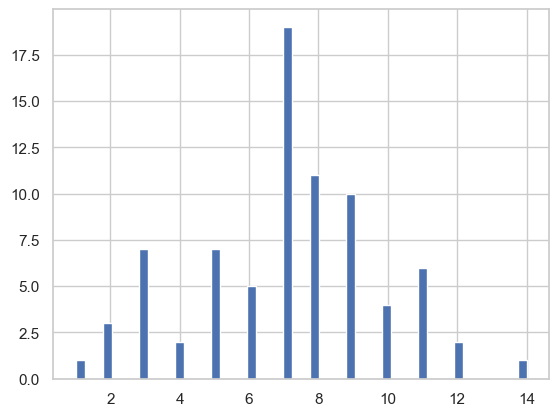

In [11]:
lengths = [len(seq) for seq in X_seq]
plt.hist(lengths, bins=50)
plt.show()


In [12]:
X_train,X_test,y_train,y_test=train_test_split(X_pad,y,test_size=0.33,random_state=42)
# model=Sequential()
# model.add(Dense(128,activation="relu"))
# model.add(Dense(64,activation="relu"))
# model.add(Dense(5,activation="softmax"))
# model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"],)


In [13]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

max_words = 10000   # تعداد واژه‌های منحصربه‌فرد
max_len = 50        # طول دنباله (پدینگ)

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(LSTM(64, return_sequences=False))   # می‌تونی return_sequences=True بزاری اگه LSTM دوم هم می‌خوای
model.add(Dropout(0.3))
model.add(Dense(64, activation="relu"))
model.add(Dense(5, activation="softmax"))   # چون 5 کلاس داری

model.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 5)                 325       
                                                                 
Total params: 1,333,893
Trainable params: 1,333,893
Non-trainable params: 0
_________________________________________________________________


In [14]:
h=model.fit(X_train,y_train,epochs=200,batch_size=10,)

Epoch 1/200
6/6 [==============================] - 1s 14ms/step - loss: 1.6103 - accuracy: 0.1923
Epoch 2/200
6/6 [==============================] - 0s 15ms/step - loss: 1.5981 - accuracy: 0.4423
Epoch 3/200
6/6 [==============================] - 0s 13ms/step - loss: 1.5867 - accuracy: 0.5769
Epoch 4/200
6/6 [==============================] - 0s 12ms/step - loss: 1.5732 - accuracy: 0.6538
Epoch 5/200
6/6 [==============================] - 0s 13ms/step - loss: 1.5479 - accuracy: 0.6923
Epoch 6/200
6/6 [==============================] - 0s 13ms/step - loss: 1.5313 - accuracy: 0.5769
Epoch 7/200
6/6 [==============================] - 0s 13ms/step - loss: 1.4701 - accuracy: 0.7115
Epoch 8/200
6/6 [==============================] - 0s 12ms/step - loss: 1.4308 - accuracy: 0.6923
Epoch 9/200
6/6 [==============================] - 0s 14ms/step - loss: 1.2897 - accuracy: 0.7308
Epoch 10/200
6/6 [==============================] - 0s 13ms/step - loss: 1.2002 - accuracy: 0.6346
Epoch 11/200
6/6 [=

In [15]:
y_pred=model.predict(X_test)
y_pred=(y_pred> 0.5).astype("int32")  

1/1 [==============================] - 0s 258ms/step


In [16]:
# پیش‌بینی احتمالات
y_pred = model.predict(X_test)

# انتخاب کلاس با بیشترین احتمال
y_pred_classes = np.argmax(y_pred, axis=1)

# حالا می‌تونی مقایسه کنی
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_classes))
print(confusion_matrix(y_test, y_pred_classes))


1/1 [==============================] - 0s 14ms/step
              precision    recall  f1-score   support

           0       0.50      0.29      0.36         7
           1       0.25      0.17      0.20         6
           2       0.12      1.00      0.22         1
           3       0.00      0.00      0.00         6
           4       0.71      0.83      0.77         6

    accuracy                           0.35        26
   macro avg       0.32      0.46      0.31        26
weighted avg       0.36      0.35      0.33        26

[[2 0 3 1 1]
 [1 1 2 2 0]
 [0 0 1 0 0]
 [0 3 2 0 1]
 [1 0 0 0 5]]


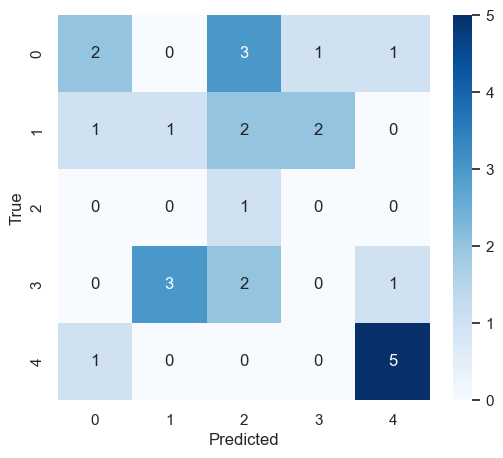

In [17]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [18]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets